# A/B Testing

Goal: Get a feel for A/B-testing using Permutation Tests.

One of the most common usages for A/B testing is for understanding the impact of changes to websites (e.g. website design changes, serving of different advertisements). For example, the website owner makes a small change to the layout of a webpage to a portion of the traffic and compares the user behavior on the old design against the user behavior on the new design. If there's a significant change in wanted behavior, the website owner will make the change on the entire website.

Parameters that a website owner needs to consider when executing an A/B test are:
* The portion of website traffic that should make up the treatment group (i.e. users who see the changed website).
* How long the AB-test should last.
* The impact and level of confidence in the result of the test to declare it a "success". That is, you should be comfortable that the result of your test bring enough positive change (e.g. increase in revenue) and that it's not due to random flucuations in website traffic.

In [1]:
% matplotlib inline

from datascience import *
import numpy as np
import matplotlib.pyplot as plt

## Aaron's Awesome Amphibian Adoptions runs an AB test

Suppose that the massively popular `aaronsawesomeamphibianadoptions.com` helps support its program by selling ads on its website. Aaron, the site owner, is considering making a change to his ad-targeting software in hopes of increasing fly sales at a sponsoring pet store. Every click on an advertisement leads to 2 cents in revenue.

Consider the following scenarios for running Aaron's AB test. 
* Each AB test runs for 7 days, and website visits are recored up to the hour. Hours are recorded by "number of hours since starting the AB test" (between 0 and 167).
* `PageA` denotes the current webpage (control), whereas `PageB` denotes the webpage with the change (treatment).
* The column `clicked` denotes whether an ad was clicked on during the recorded visit (1) or not (0).

### Exploring different splitting of treatment and control groups

* Each of the files given below are results of the "same" hypothetical AB-test with different treatment/control group splits. 

Answer the following questions for each of the following AB-tests:
* How many visitors to the webpage were there during the week of the AB test?
* How many were shown `pageA` vs `pageB`?
* Plot the number of visits for each page by the hour.
* What is the average *click-rate* on the page overall? What about on `pageA`? `pageB`?
    - click-rate is the number of ad-clicks per visitor on the page.
* Plot the click-rate for each page by the hour.
* Which page made more money during the week? How much more? (was the AB-test successful?)
* Was the difference in click-rates bewteen the pages significant? 
    - Run a permutation test and calculate the p-value

#### The 50-50 split

Read in the file `data/AB_test_50_50.csv` and analyze the results of the AB test which splits website traffic evenly into treatment/control.

In [5]:
# Your Code Here
def split(file):
    ads = Table().read_table(file)
    number_visitors = str(ads.num_rows)
    print("visitors:" + number_visitors)

    number_pageA_visits = str(ads.where('page_id', are.equal_to('pageA')).num_rows)
    number_pageB_visits = str(ads.where('page_id', are.equal_to('pageB')).num_rows)
    print("visits of pageA vs visits of pageB: " + number_pageA_visits + " vs " + number_pageB_visits)

    pageA = ads.where('page_id', are.equal_to('pageA')).group('hour').relabeled('count', 'pageA')
    pageB = ads.where('page_id', are.equal_to('pageB')).group('hour').relabeled('count', 'pageB')
    combined = pageA.join('hour', pageB)
    combined_graph = combined.plot('hour')

    print("The average click-rate on the overall:" + str(ads.where('clicked', are.equal_to(1)).num_rows/ads.num_rows))
    print("The average click-rate on the pageA:" + str(ads.where('clicked', 
              are.equal_to(1)).where('page_id', 
                                    are.equal_to('pageA')).num_rows/ads.where('page_id', are.equal_to('pageA')).num_rows))
    print("The average click-rate on the pageB:" + str(ads.where('clicked', 
              are.equal_to(1)).where('page_id', 
                                    are.equal_to('pageB')).num_rows/ads.where('page_id', are.equal_to('pageB')).num_rows))

    total_visits_by_hour_A = pageA.column('pageA')
    clicked_by_hour_A = ads.where('page_id', are.equal_to('pageA')).group('hour', np.sum).column('clicked sum')
    pageA_click_rate = clicked_by_hour_A/total_visits_by_hour_A
    pageA_click_rate
    total_visits_by_hour_B = pageB.column('pageB')
    clicked_by_hour_B = ads.where('page_id', are.equal_to('pageB')).group('hour', np.sum).column('clicked sum')
    pageB_click_rate = clicked_by_hour_B/total_visits_by_hour_B
    click_rate = Table().with_columns(
                'pageA click rate', pageA_click_rate,
                'pageB click rate', pageB_click_rate,
                'hour', np.arange(len(pageB_click_rate))
                ).plot('hour')

    max_clicked = str(0.02*max(ads.where('page_id', are.equal_to('pageB')).column('clicked').sum(), ads.where('page_id', are.equal_to('pageA')).column('clicked').sum()))
    abs_clicked = str(0.02*abs(ads.where('page_id', are.equal_to('pageB')).column('clicked').sum()-ads.where('page_id', are.equal_to('pageA')).column('clicked').sum()))
    if max_clicked == str(0.02*ads.where('page_id', are.equal_to('pageB')).column('clicked').sum()):
        print("pageB made $" + abs_clicked + " more money")
    else:
        print("pageA made $" + abs_clicked + " more money")

visitors:101424
visits of pageA vs visits of pageB: 45868 vs 55556
The average click-rate on the overall:0.20525713834989745
The average click-rate on the pageA:0.19798116333827506
The average click-rate on the pageB:0.21126430988552092
pageB made $53.120000000000005 more money


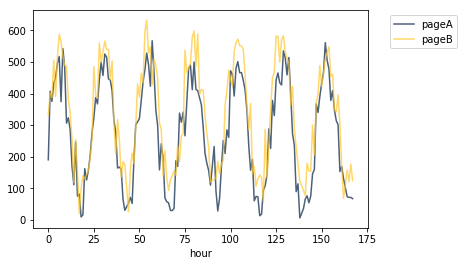

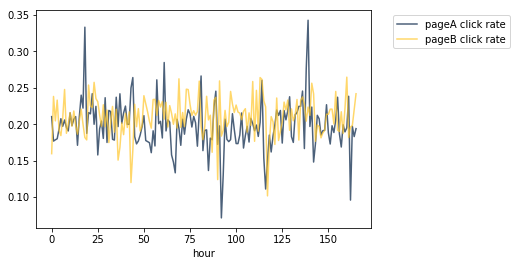

In [6]:
split("data/AB_test_50_50.csv")

#### The 85-15 split

Read in the file `data/AB_test_85_15.csv` and analyze the results of the AB test which splits website traffic evenly into treatment/control.

visitors:95641
visits of pageA vs visits of pageB: 79393 vs 16248
The average click-rate on the overall:0.20384563105780992
The average click-rate on the pageA:0.20175582230171427
The average click-rate on the pageB:0.2140571147218119


ValueError: Column length mismatch. New column does not have the same number of rows as table.

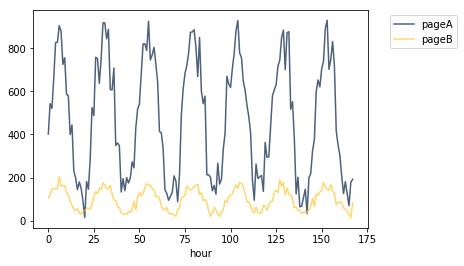

In [8]:
split("data/AB_test_85_15.csv")

visitors:95641
visits of pageA vs visits of pageB: 79393 vs 16248
The average click-rate on the overall:0.20384563105780992
The average click-rate on the pageA:0.20175582230171427
The average click-rate on the pageB:0.2140571147218119


ValueError: Column length mismatch. New column does not have the same number of rows as table.

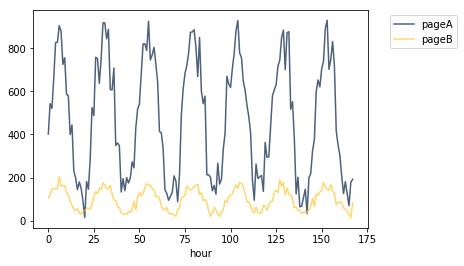

In [8]:
ads = Table().read_table("data/AB_test_85_15.csv")
number_visitors = str(ads.num_rows)
print("visitors:" + number_visitors)

number_pageA_visits = str(ads.where('page_id', are.equal_to('pageA')).num_rows)
number_pageB_visits = str(ads.where('page_id', are.equal_to('pageB')).num_rows)
print("visits of pageA vs visits of pageB: " + number_pageA_visits + " vs " + number_pageB_visits)

pageA = ads.where('page_id', are.equal_to('pageA')).group('hour').relabeled('count', 'pageA')
pageB = ads.where('page_id', are.equal_to('pageB')).group('hour').relabeled('count', 'pageB')
combined = pageA.join('hour', pageB)
combined_graph = combined.plot('hour')

print("The average click-rate on the overall:" + str(ads.where('clicked', are.equal_to(1)).num_rows/ads.num_rows))
print("The average click-rate on the pageA:" + str(ads.where('clicked', 
          are.equal_to(1)).where('page_id', 
                                are.equal_to('pageA')).num_rows/ads.where('page_id', are.equal_to('pageA')).num_rows))
print("The average click-rate on the pageB:" + str(ads.where('clicked', 
          are.equal_to(1)).where('page_id', 
                                are.equal_to('pageB')).num_rows/ads.where('page_id', are.equal_to('pageB')).num_rows))

total_visits_by_hour_A = pageA.column('pageA')
clicked_by_hour_A = ads.where('page_id', are.equal_to('pageA')).group('hour', np.sum).column('clicked sum')
pageA_click_rate = clicked_by_hour_A/total_visits_by_hour_A
pageA_click_rate
total_visits_by_hour_B = pageB.column('pageB')
clicked_by_hour_B = ads.where('page_id', are.equal_to('pageB')).group('hour', np.sum).column('clicked sum')
pageB_click_rate = clicked_by_hour_B/total_visits_by_hour_B
click_rate = Table().with_columns(
            'pageA click rate', pageA_click_rate,
            'pageB click rate', pageB_click_rate,
            'hour', np.arange(len(pageA_click_rate))
            ).plot('hour')

max_clicked = str(0.02*max(ads.where('page_id', are.equal_to('pageB')).column('clicked').sum(), ads.where('page_id', are.equal_to('pageA')).column('clicked').sum()))
abs_clicked = str(0.02*abs(ads.where('page_id', are.equal_to('pageB')).column('clicked').sum()-ads.where('page_id', are.equal_to('pageA')).column('clicked').sum()))
if max_clicked == str(0.02*ads.where('page_id', are.equal_to('pageB')).column('clicked').sum()):
    print("pageB made $" + abs_clicked + " more money")
else:
    print("pageA made $" + abs_clicked + " more money")

In [ ]:
data/

In [ ]:
# Your Code Here

#### The 95-5 split

Read in the file `data/AB_test_95_5.csv` and analyze the results of the AB test which splits website traffic evenly into treatment/control.

In [14]:
# Your Code Here
third_ads = Table().read_table("data/AB_test_95_5.csv")
third_pageA_result = third_ads.where('page_id', are.equal_to('pageA')).num_rows
third_pageB_result = third_ads.where('page_id', are.equal_to('pageB')).num_rows
third_pageB_result/third_pageA_result

0.06077596883514603

#### The 99-1 split

Read in the file `data/AB_test_99_1.csv` and analyze the results of the AB test which splits website traffic evenly into treatment/control.

In [16]:
# Your Code Here
fourth_ads = Table().read_table("data/AB_test_99_1.csv")
fourth_pageA_result = fourth_ads.where('page_id', are.equal_to('pageA')).num_rows
fourth_pageB_result = fourth_ads.where('page_id', are.equal_to('pageB')).num_rows
fourth_pageB_result/fourth_pageA_result

0.011006373808269828

### Conclusion

It's potentially quite costly to show the new webpage to a large number of users, given that the proposed change may be ineffective. One way to mitigate this risk is to shrink the treatment group. However, this decision is a trade-off for noisier results.

* How big *does* our sample need to be?

$$ n = 16\sigma^2/\Delta^2 $$

Where: $\sigma^2$ is the variance of the outcome metric 
* in case of binary outcome, $\sigma^2 = p(1-p)$, where $p$ is the probability $X = 1$.
*  $\Delta$ is the sensitivity (amount you want to detect) at 80% power -- i.e. the difference in ($p_1 - p_2$). This parameter is based on how small of a variation you would like to meaningfully detect.

* For a nice dashboard calculator: https://www.evanmiller.org/ab-testing/sample-size.html

In [ ]:
# Code here

### When to stop an AB-test?

Imagine your 1 week long AB test has gone live and you're anxiously watching the results every hour. A natural impulse would be to stop the AB test as soon as you see a positive result -- calling it successful. This is bad! The test period must be fixed ahead of time. To illustrate this, read in data for another AB test here: `data/AB_test_time_series.csv`. 

* Answer the same questions as above.
* Now, for every hour in the AB test, pretend like you ended the AB test exactly then. Compute the significance levels of each of these tests, for each hour between 0 and 167. You should have a sequence of p-values. What do you see? Would've we come to the wrong conclusion by finishing the test early?

In [ ]:
# Your Code Here

In [ ]:
# Your Code Here

For more discussion on these issues in AB testing, see: https://www.evanmiller.org/how-not-to-run-an-ab-test.html